# Density Graph

In [1]:
import ROOT
#from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F, TGraph
#from ROOT import gROOT, gBenchmark, gRandom, gSystem, Double
import ctypes
from math import sin
from array import array

Welcome to JupyROOT 6.24/00


In [2]:
c1 = ROOT.TCanvas('c1','A Simple Graph Example',200,10,700,500)
c1.SetFillColor(42)
c1.SetGrid()

In [3]:
# gr = TGraph( n, x, y )
fdGraph = ROOT.TGraph("RestGas/restgasthickness_210421_Normal_IP_no_Cryopump.txt")

In [4]:
npoints = fdGraph.GetN()
print("graph points: ", npoints)

graph points:  302


In [5]:
# set double var using var=ctypes.c_double(1.)
ozmin=ctypes.c_double(1.)
ozmax=ctypes.c_double(1.)
odmin=ctypes.c_double(1.)
odmax=ctypes.c_double(1.)

In [6]:
ozmin

c_double(1.0)

In [7]:
fdGraph.ComputeRange(ozmin, odmin, ozmax, odmax)
print("ozmin: {}, odmin: {}, ozmax: {}, odmax: {}".format(ozmin.value, odmin.value, ozmax.value, odmax.value))

ozmin: -570.1, odmin: 0.0, ozmax: 1074.875, odmax: 500.0


In [8]:
# Make cummulative graph
fCDF = ROOT.TGraph(npoints)
fCDFi = ROOT.TGraph(npoints)

In [9]:
# Make Corrected Density Graph
fdGraphCorr = ROOT.TGraph(npoints)

In [10]:
x=ctypes.c_double(0.)
y=ctypes.c_double(0.)
ysum=ctypes.c_double(0.)
ycorr=ctypes.c_double(0.)
xlast=ctypes.c_double(-5.530045000000000073e+02)

In [11]:
# sum.value = (ysum.value + y.value)
# ysum.value

In [14]:
for i in range(npoints):

    # fetch one point
    fdGraph.GetPoint(i,x,y)
    print(y)
    ysum.value = (ysum.value + y.value)

    # CDF and Inverted CDF from fdGraph
    fCDF.SetPoint(i, x, ysum)
    fCDFi.SetPoint(i, ysum, x)  # to acces "x" by random "y"

    # density divided by bin_width
    ycorr.value = (y.value/(x.value - xlast.value))  #corrected density profile
    fdGraphCorr.SetPoint(i, x, ycorr)

    #cout << "point = " << i << "   z = " << x << "   d = " << y << "   dcor = " << ycorr << endl;
    xlast=x;

c_double(0.0)


ZeroDivisionError: float division by zero

In [13]:
gr.SetLineColor(2)
gr.SetLineWidth(1)
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
gr.SetTitle('Density Graph')
gr.GetXaxis().SetTitle('z [cm]')
gr.GetYaxis().SetTitle('rho [?]')
gr.Draw('ACP')

NameError: name 'gr' is not defined

TCanvas.Update() draws the frame, after which one can change it

In [22]:
c1.Update()
c1.GetFrame().SetFillColor(21)
c1.GetFrame().SetBorderSize(5)
c1.Modified()
c1.Update()

Draw all canvases 

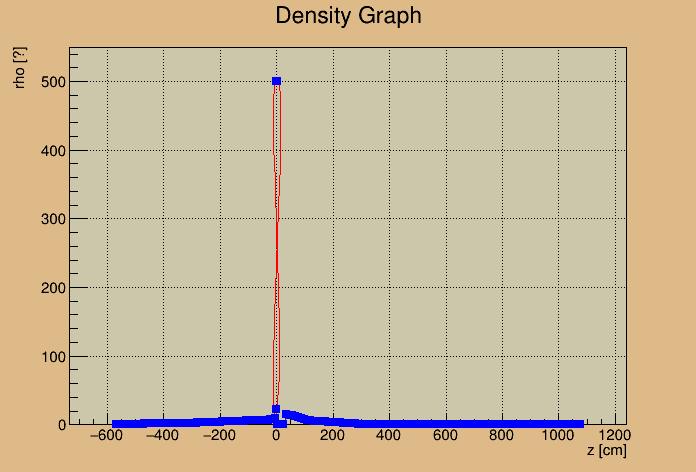

In [23]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt


fname = "Vac_sim.txt"
data = np.genfromtxt(fname, skip_header = 15)

plt.semilogy(data[:,0],data[:,1], label = "1")


plt.ylabel("rest-gas thickness $[10^{12}$ atoms/cm$^2$]")
plt.xlabel("position in cm")

plt.grid()
plt.legend()
plt.show()